# Squidpy test

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import squidpy
import skimage.transform
import numpy
import pandas as pd

### Create random data with one common and one rare gene

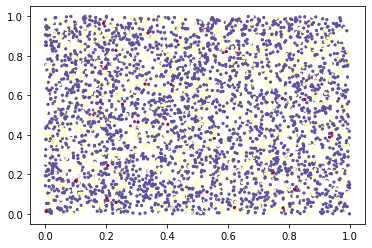

In [41]:
from numpy.random import default_rng
rng = default_rng(seed=12345)

N_mrna = 5000
prob_cell1 = 0.01
prob_cell2 = 0.4

cell_labels = numpy.zeros((N_mrna), dtype=int)

tmp = rng.uniform(size=N_mrna)
mask1 = (tmp <= prob_cell1)
mask2 = (prob_cell1 < tmp) * (tmp <= prob_cell2)
mask3 = (prob_cell2 < tmp) 
cell_labels[mask1]=0
cell_labels[mask2]=1
cell_labels[mask3]=2

xy = rng.random((N_mrna, 2))
plt.scatter(xy[:,0],xy[:,1], c=cell_labels, cmap='Spectral', s=5)

### Make adata

In [42]:
import anndata

cell_types = ["cell_1", "cell_2", "cell_3"]
types = [cell_types[i] for i in cell_labels] 
df = pd.DataFrame(types, columns=['cell_type'])
df['cell_type'] = df['cell_type'].astype('category')
display(df.dtypes)

adata = anndata.AnnData(obs=df, obsm={"spatial": xy})


cell_type    category
dtype: object

/Users/ldalessi/anaconda3/envs/pyro/lib/python3.8/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [43]:
adata

AnnData object with n_obs × n_vars = 5000 × 0
    obs: 'cell_type'
    obsm: 'spatial'

  0%|          | 0/1 [00:00<?, ?/s]

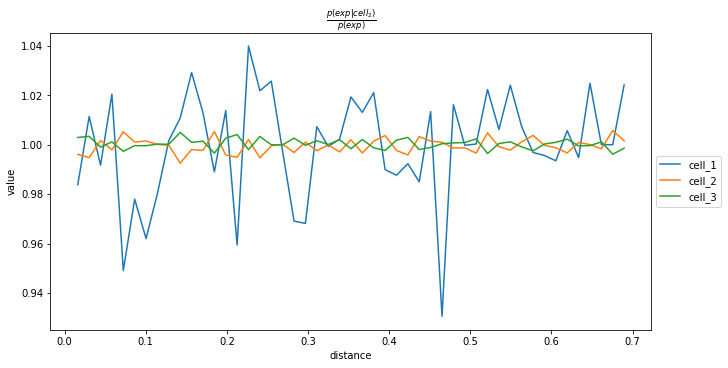

In [45]:
squidpy.gr.co_occurrence(adata, cluster_key="cell_type")
squidpy.pl.co_occurrence(
    adata,
    cluster_key="cell_type", 
    clusters="cell_2",
    figsize=(10, 5)
)

In [ ]:
adata

In [ ]:
sq.gr.co_occurrence(adata, cluster_key="celltype_mapped_refined")
sq.pl.co_occurrence(
    adata,
    cluster_key="celltype_mapped_refined",
    clusters="Lateral plate mesoderm",
    figsize=(10, 5),
)

In [ ]:
type(rng)

In [ ]:
rng.
xy = rng.rand(200,2)

plt.scatter(xy)